<a href="https://colab.research.google.com/github/Arju-Jawla/Mean-Sea-Level-Anomalies/blob/main/MSLA_05_ARIMA_ans_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. INSTALLING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.stattools import adfuller

In [3]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.5 MB/s eta 0:00:00


In [4]:
from pmdarima import auto_arima

In [75]:
import matplotlib.dates as mdates

## 2. UPLOADING DATASET

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Project Learnings/Data/sla_ports_data.csv')

In [6]:
df.head()

,Date,Vishakhapatnam,Kandla,Mumbai,Paradip,Cochin,time
0,1993-02-15,-0.10529,0.00740,0.046175,-0.188589,0.072789,0
1,1993-03-15,-0.10116,-0.01496,0.027392,-0.253900,0.071356,1
2,1993-04-15,-0.05141,-0.02428,0.028483,-0.151467,0.063489,2
3,1993-05-15,-0.04368,-0.00176,0.002800,-0.030378,0.004533,3
4,1993-06-15,-0.01149,0.01566,-0.011658,0.062744,-0.026656,4


In [7]:
# Create a new DataFrame with only 'Vishakhapatnam' data and 'Date' as index
vishakhapatnam_df = df.set_index("Date")[["Vishakhapatnam"]]

In [8]:
# Save the DataFrame to a CSV file
vishakhapatnam_df.to_csv("/content/drive/MyDrive/Project Learnings/Data/Vishakhapatnam_data.csv")

In [9]:
vishakhapatnam_df.head()

,Vishakhapatnam
Date,
1993-02-15,-0.10529
1993-03-15,-0.10116
1993-04-15,-0.05141
1993-05-15,-0.04368
1993-06-15,-0.01149


In [18]:
vishakhapatnam_df.shape

(364, 1)

In [10]:
# Run the ADF test on the 'Vishakhapatnam' column
result = adfuller(vishakhapatnam_df["Vishakhapatnam"])

# Extract and print the results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

ADF Statistic: -2.6891445764784434
p-value: 0.0759356424881402
Critical Values: {'1%': -3.4493918438232525, '5%': -2.8699298018856574, '10%': -2.5712397066390458}


In [11]:
# Apply first-order differencing
vishakhapatnam_diff = vishakhapatnam_df.diff().dropna()

# Display the differenced series
print(vishakhapatnam_diff.head())

            Vishakhapatnam
Date                      
1993-03-15         0.00413
1993-04-15         0.04975
1993-05-15         0.00773
1993-06-15         0.03219
1993-07-15        -0.01254


In [12]:
# Run ADF test on the differenced series
result_diff = adfuller(vishakhapatnam_diff["Vishakhapatnam"])

# Print the ADF test results for the differenced series
print("ADF Statistic (Differenced):", result_diff[0])
print("p-value (Differenced):", result_diff[1])
print("Critical Values (Differenced):", result_diff[4])

ADF Statistic (Differenced): -7.5993722179820145
p-value (Differenced): 2.4120954042121372e-11
Critical Values (Differenced): {'1%': -3.4494474563375737, '5%': -2.8699542285903887, '10%': -2.5712527305187987}


In [20]:
# Split data into training (up to last 12 months) and test sets (last 12 months)
train_data = vishakhapatnam_diff[:-12]
test_data = vishakhapatnam_diff[-12:]

In [21]:
train_data

,Vishakhapatnam
Date,
1993-03-15,0.00413
1993-04-15,0.04975
1993-05-15,0.00773
1993-06-15,0.03219
1993-07-15,-0.01254
...,...
2022-01-15,-0.23428
2022-02-15,-0.05482
2022-03-15,0.01757


In [22]:
test_data

,Vishakhapatnam
Date,
2022-06-15,-0.02572
2022-07-15,0.01196
2022-08-15,-0.03276
2022-09-15,0.08577
2022-10-15,0.17974
2022-11-15,-0.11032
2022-12-15,-0.06351
2023-01-15,-0.06695
2023-02-15,-0.13515


In [24]:
#Fit the Auto ARIMA model
model_auto_arima = auto_arima(train_data,
                              seasonal=False,
                              trace=True,
                              stepwise=True,
                              error_action='ignore',
                              suppress_warnings=True)

# Print the summary of the model
print(model_auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-884.902, Time=2.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-772.397, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-775.387, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-777.552, Time=0.79 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-855.748, Time=0.53 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-870.883, Time=0.43 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-870.347, Time=0.72 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-872.217, Time=0.54 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-826.428, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-865.870, Time=0.46 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-871.488, Time=0.33 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-867.101, Time=0.77 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-877.471, Time=0.91 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 8.295 seconds
                      

In [25]:
# Forecast using Auto ARIMA
forecast_auto_arima, conf_int_auto_arima = model_auto_arima.predict(n_periods=12, return_conf_int=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [26]:
print("Forecast values:\n", forecast_auto_arima)
print("\nConfidence intervals:\n", conf_int_auto_arima)

Forecast values:
 351   -0.011109
352   -0.053360
353   -0.042273
354    0.010899
355    0.053005
356    0.042126
357   -0.010692
358   -0.052652
359   -0.041980
360    0.010486
361    0.052300
362    0.041833
dtype: float64

Confidence intervals:
 [[-0.1458062   0.12358896]
 [-0.18805863  0.08133767]
 [-0.17704558  0.09249951]
 [-0.12396116  0.14575957]
 [-0.08185579  0.18786614]
 [-0.09280767  0.17706064]
 [-0.14571284  0.12432931]
 [-0.18767355  0.08236988]
 [-0.17707364  0.09311378]
 [-0.12469348  0.14566603]
 [-0.08287999  0.18748086]
 [-0.09341788  0.17708463]]


In [40]:
forecast_auto_arima.reset_index(inplace=True,drop=True)

In [41]:
forecast_auto_arima

,0
0,-0.011109
1,-0.053360
2,-0.042273
3,0.010899
4,0.053005
5,0.042126
6,-0.010692
7,-0.052652
8,-0.041980
9,0.010486


In [44]:
#forecast_index =test_data.index

In [47]:
forecast_df_arima = pd.DataFrame(forecast_auto_arima, columns=['Forecast_ARIMA'])

In [48]:
print(forecast_df_arima)

    Forecast_ARIMA
0        -0.011109
1        -0.053360
2        -0.042273
3         0.010899
4         0.053005
5         0.042126
6        -0.010692
7        -0.052652
8        -0.041980
9         0.010486
10        0.052300
11        0.041833


In [51]:
df_forecast_arima = forecast_df_arima.set_index(test_data.index)[["Forecast_ARIMA"]]

In [52]:
df_forecast_arima

,Forecast_ARIMA
Date,
2022-06-15,-0.011109
2022-07-15,-0.053360
2022-08-15,-0.042273
2022-09-15,0.010899
2022-10-15,0.053005
2022-11-15,0.042126
2022-12-15,-0.010692
2023-01-15,-0.052652
2023-02-15,-0.041980


In [53]:
#Fit the Auto ARIMA model
model_auto_sarima = auto_arima(train_data,
                              seasonal=True,
                              trace=True,
                              stepwise=True,
                              error_action='ignore',
                              suppress_warnings=True)

# Print the summary of the model
print(model_auto_sarima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-877.471, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-770.429, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-773.415, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-775.579, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-772.397, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-868.137, Time=2.42 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.23 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-862.752, Time=0.88 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-861.150, Time=1.14 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-884.902, Time=0.54 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-855.748, Time=0

In [54]:
# Forecast using Auto ARIMA
forecast_auto_sarima, conf_int_auto_sarima = model_auto_sarima.predict(n_periods=12, return_conf_int=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [55]:
print("Forecast values:\n", forecast_auto_sarima)
print("\nConfidence intervals:\n", conf_int_auto_sarima)

Forecast values:
 351   -0.011109
352   -0.053360
353   -0.042273
354    0.010899
355    0.053005
356    0.042126
357   -0.010692
358   -0.052652
359   -0.041980
360    0.010486
361    0.052300
362    0.041833
dtype: float64

Confidence intervals:
 [[-0.1458062   0.12358896]
 [-0.18805863  0.08133767]
 [-0.17704558  0.09249951]
 [-0.12396116  0.14575957]
 [-0.08185579  0.18786614]
 [-0.09280767  0.17706064]
 [-0.14571284  0.12432931]
 [-0.18767355  0.08236988]
 [-0.17707364  0.09311378]
 [-0.12469348  0.14566603]
 [-0.08287999  0.18748086]
 [-0.09341788  0.17708463]]


In [56]:
forecast_auto_sarima.reset_index(inplace=True,drop=True)

In [57]:
forecast_auto_sarima

,0
0,-0.011109
1,-0.053360
2,-0.042273
3,0.010899
4,0.053005
5,0.042126
6,-0.010692
7,-0.052652
8,-0.041980
9,0.010486


In [58]:
forecast_df_sarima = pd.DataFrame(forecast_auto_sarima, columns=['Forecast_SARIMA'])

In [59]:
forecast_df_sarima

,Forecast_SARIMA
0,-0.011109
1,-0.053360
2,-0.042273
3,0.010899
4,0.053005
5,0.042126
6,-0.010692
7,-0.052652
8,-0.041980
9,0.010486


In [60]:
df_forecast_sarima = forecast_df_sarima.set_index(test_data.index)[["Forecast_SARIMA"]]

In [61]:
df_forecast_sarima

,Forecast_SARIMA
Date,
2022-06-15,-0.011109
2022-07-15,-0.053360
2022-08-15,-0.042273
2022-09-15,0.010899
2022-10-15,0.053005
2022-11-15,0.042126
2022-12-15,-0.010692
2023-01-15,-0.052652
2023-02-15,-0.041980


In [79]:
train_data.index.dtype

dtype('O')

In [84]:
# Convert index to datetime
train_data.index = pd.to_datetime(train_data.index)
test_data.index = pd.to_datetime(test_data.index)
df_forecast_arima.index = pd.to_datetime(df_forecast_arima.index)
df_forecast_sarima.index = pd.to_datetime(df_forecast_sarima.index)

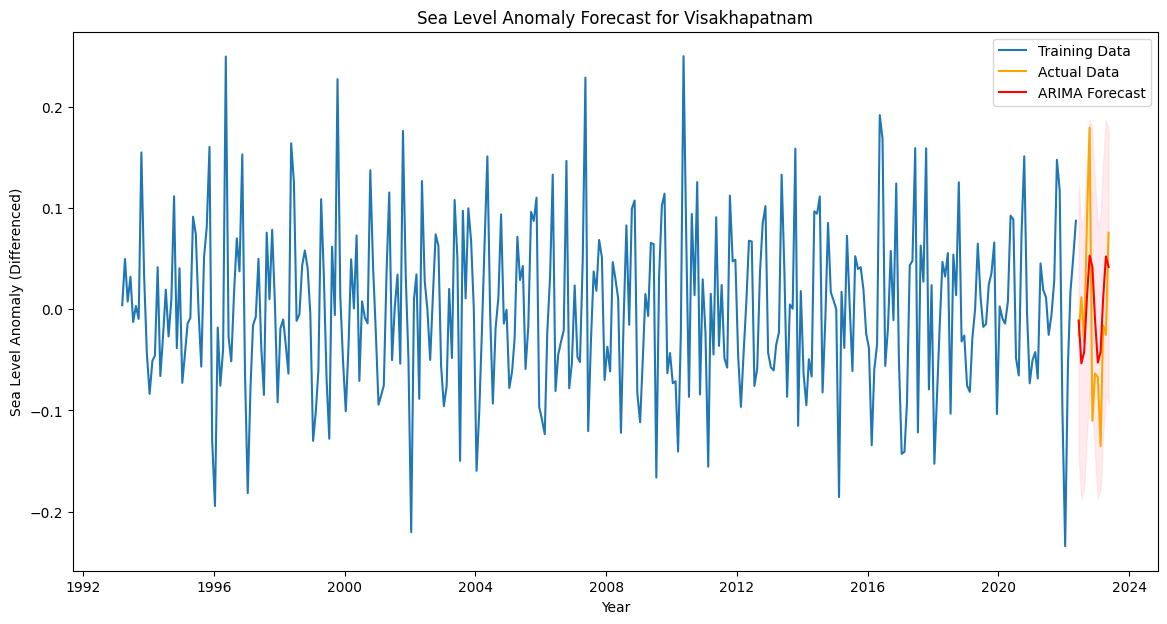

In [81]:
# Plotting historical, forecasted, actual data, and confidence intervals
plt.figure(figsize=(14, 7))

# Historical (training) data
plt.plot(train_data.index, train_data, label="Training Data")

# Actual test data for comparison
plt.plot(test_data.index, test_data, label="Actual Data", color="orange")

# ARIMA Forecast
plt.plot(df_forecast_arima.index, df_forecast_arima['Forecast_ARIMA'], label="ARIMA Forecast", color="red")

# ARIMA Confidence Intervals
plt.fill_between(df_forecast_arima.index,
                 conf_int_auto_arima[:, 0],
                 conf_int_auto_arima[:, 1],
                 color='pink', alpha=0.3)

# Customize the plot
plt.title("Sea Level Anomaly Forecast for Visakhapatnam")
plt.xlabel("Year")
plt.ylabel("Sea Level Anomaly (Differenced)")
plt.legend()
plt.show()


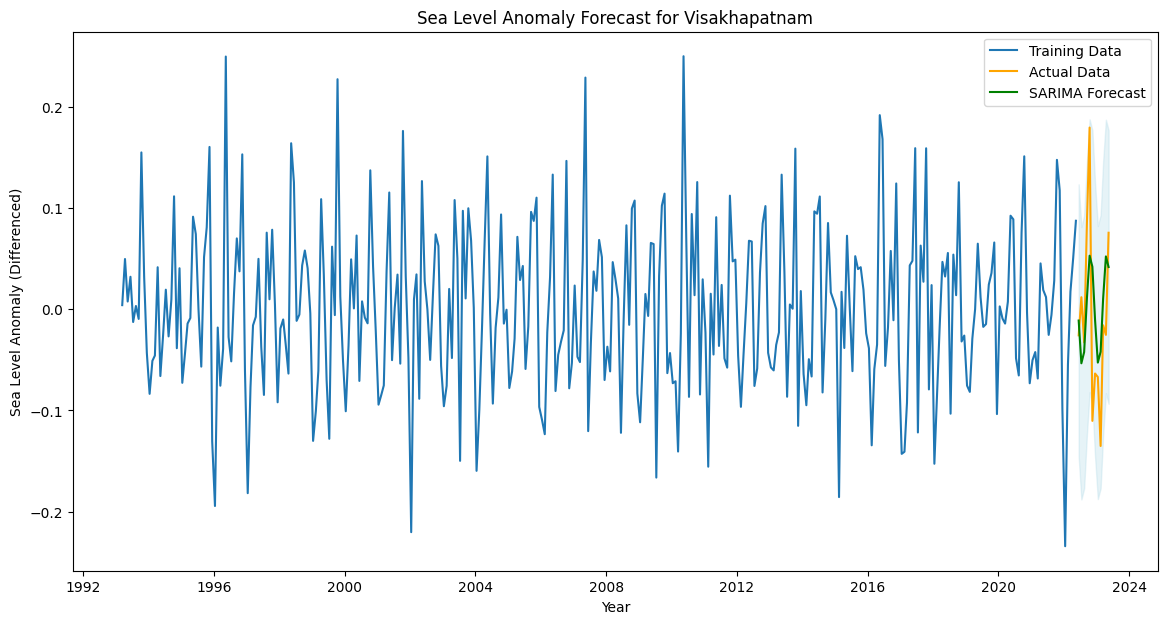

In [86]:
# Plotting historical, forecasted, actual data, and confidence intervals
plt.figure(figsize=(14, 7))

# Historical (training) data
plt.plot(train_data.index, train_data, label="Training Data")

# Actual test data for comparison
plt.plot(test_data.index, test_data, label="Actual Data", color="orange")

# ARIMA Forecast
plt.plot(df_forecast_sarima.index, df_forecast_sarima['Forecast_SARIMA'], label="SARIMA Forecast", color="green")

# ARIMA Confidence Intervals
plt.fill_between(df_forecast_sarima.index,
                 conf_int_auto_sarima[:, 0],
                 conf_int_auto_sarima[:, 1],
                 color='lightblue', alpha=0.3)

# Customize the plot
plt.title("Sea Level Anomaly Forecast for Visakhapatnam")
plt.xlabel("Year")
plt.ylabel("Sea Level Anomaly (Differenced)")
plt.legend()
plt.show()